# 5 Pythonによる科学計算（NumpyとScipy）

5章では、2章で基礎を学んだNumpyとScipyのライブラリについて、これらをさらに使いこなす力を身に付けていきましょう。この5章および次の6章では、データを操作するテクニックが多く登場します。それらのテクニックの必要性は、すぐにはわからないかもしれませんが、総合問題や後半の章で、実際のデータを扱う際にその利点がわかると思います。しっかりと身につけていきましょう。

具体的には、5章の前半はNumpyに関する配列操作のテクニック、後半はScipyを使った科学計算の応用で、行列の分解や積分、微分方程式や最適化計算について扱っていきます。


ゴール：NumpyやScipyを使ったデータの生成や科学的計算方法の知識を深める

- **[5.1 概要と事前準備](#5.1-概要と事前準備)**
    - [5.1.1 この章の概要](#5.1.1-この章の概要)
    - [5.1.2 この章で使うライブラリのインポート](#5.1.2-この章で使うライブラリのインポート)
<br><br>
- **[5.2 Numpyを使った計算の応用](#5.2-Numpyを使った計算の応用)**
    - [5.2.1 インデックス参照](#5.2.1-インデックス参照)
    - [5.2.2 Numpyの演算処理](#5.2.2-Numpyの演算処理)
    - [5.2.3 配列操作とブロードキャスト](#5.2.3-配列操作とブロードキャスト)
<br><br>
- **[5.3 Scipyを使った計算の応用](#5.3-Scipyを使った計算の応用)**
    - [5.3.1 補間](#5.3.1-補間)
    - [5.3.2 線形代数：行列の分解](#5.3.2-線形代数：行列の分解)
    - [5.3.3 積分と微分方程式](#5.3.3-積分と微分方程式)
    - [5.3.4 最適化](#5.3.4-最適化)
<br><br>
- **[5.4 総合問題](#5.4-総合問題)**
    - [■総合問題5-1 コレスキー分解](#■総合問題5-1-コレスキー分解)
    - [■総合問題5-2 積分](#■総合問題5-2-積分)
    - [■総合問題5-3 最適化問題](#■総合問題5-3-最適化問題)

***

## 5.1 概要と事前準備
キーワード：Numpy、Scipy、Matplotlib

2章にて、NumpyやScipyを使った科学計算の基礎を学びました。この章では、さらにその知識を深めていきます。

### 5.1.1 この章の概要

これまで、Pythonの基礎的な文法や、代表的な科学技術計算ライブラリNumpy、Scipyの基本的な使い方を学びました。この章では、これらのライブラリを引き続き使用し、さらに色々な計算テクニックを身に付けていきましょう。

Numpyはインデックス参照やブロードキャストについて、Scipyについては線形代数や積分計算、最適化計算について見ていきます。

5章と6章は、データを操作するテクニックが多く登場します。最初はそれらのテクニックの必要性をあまり実感できないかと思いますが、各章の総合問題で実際のデータを使って、それらの手法を活用すると、その利点がわかると思います。しっかりと身につけていきましょう。

この章の参考文献として、巻末「A-10」をご覧ください。

なお、「5.3　Scipy」では、数学的に少し高度なものを扱っています。おそらくこれらは理系の大学3〜4年生までに習うレベルのもので、初見の方はすぐに理解できないかもしれません。後の章ですべてを使うわけではないので、線形代数（行列分解など）、微分方程式、最適化計算（線形計画法）等をまだやっていない方は、詳細は理解できなくても大丈夫です。

ここで扱った理由は、これらの分野の理論のみを学んできた人に、科学計算の実装はCや他の言語を使うと大変ですが、Pythonを使えば気軽に実装できることを知ってもらうためです。データサイエンスの現場や研究等で、これらの分野（微分方程式、最適化計算など）を使う必要がでてきた時には、ぜひScipyを使うことを検討してみてください。

### 5.1.2 この章で使うライブラリのインポート

この章では、2章で紹介した各種ライブラリを使います。次のようにインポートしていることを前提として、以下、進めていきます。以下のインポートでは、NumpyとScipyはもちろんですが、グラフを描くために、一部、Matplotlibも利用します。

In [1]:
# 以下のライブラリを使うので、あらかじめ読み込んでおいてください
import numpy as np
import numpy.random as random
import scipy as sp

# 可視化ライブラリ
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

# 小数第3位まで表示
%precision 3

'%.3f'

## 5.2 Numpyを使った計算の応用
ゴール：Numpyのインデックス参照やブロードキャストなど、配列に関する応用的な処理を実行できるようになる

以前の章でNumpyの使い方について、配列計算など基礎的なことを学びました。ここではさらに、応用的な操作を実施していきます。

### 5.2.1 インデックス参照
キーワード：インデックス参照、スライス、ビュー

まずは、さまざまなデータを参照するときに使うインデックス参照から説明します。以下の説明のため、次のように簡単なデータを用意します。

In [ ]:
# データの準備
# 等間隔の数字
sample_array = np.arange(10)
print('sample_array:',sample_array)

上記の結果からわかるように、このデータ`sample_array`は、0から9までの数字（配列）です。このデータの一部を置き換えることを考えます。

まずは、次のようにスライスという操作をして、先頭から5つ（`sample_array[0]～sample_array[4]`）を、別の変数である`sample_array_slice`に代入してみます。このとき、`sample_array_slice`の結果は、もちろん、0～4までの配列となります。

In [ ]:
# 元のデータ
print(sample_array)

# 前から数字を5つ取得して、sample_array_sliceに入れる（スライス）
sample_array_slice = sample_array[0:5]
print(sample_array_slice)

次に、この新しい変数`sample_array_slice`の先頭から3つ（`sample_array_slice[0]～sample_array_slice[2]`）を、10という値に置き換えます。この結果、`sample_array_slice`は、「10 10 10 3 4」となるのは明らかですが、このとき元の変数である`sample_array`の値も変わっている点に注意してください。

In [ ]:
# sample_array_sliceの3文字目までは、10で置換
sample_array_slice[0:3] = 10
print(sample_array_slice)

# スライスの変更はオリジナルのリストの要素も変更されていることに注意
print(sample_array)

#### データのコピー

このように代入元の変数の値も変わってしまうのは、コピーではなくて参照が行われているからです。すなわち、「`sample_array_slice = sample_array[0:5]`」という代入の構文は、`sample_array`の先頭から5つを`sample_array_slice`にコピーしているように見えますが、そうではなくて、`sample_array_slice`は、元の`sample_array`の先頭から5つを参照しているだけなのです。そのため、値を変更すると、元の値も変わってしまいます。

このような参照ではなくてコピーしたいときは、次のように`copy`を使います。すると、コピーしたものを参照するようになるため、変更しても元のデータは影響を受けません。

In [ ]:
# copyして別のobjectを作成
sample_array_copy = np.copy(sample_array)
print(sample_array_copy)

sample_array_copy[0:3] = 20
print(sample_array_copy)

# 元のリストの要素は変更されていない
print(sample_array)

#### ブールインデックス参照

次に、ブールインデックス参照という機能を見ていきます。これはその名の通り、`bool`（`True`か`False`かの真偽値）によって、どのデータを取り出すかを決める機能です。言葉で説明しても分かりにくいので、以下で具体例を見ていきます。

まずは、次のように、`sample_names`と`data`という2つの配列を用意してみます。`sample_names`は、「a」「b」「c」「d」「a」という値を要素として持つ5つの配列、`data`は、標準正規分布に則った5×5のランダムな値を持つ配列です。

In [ ]:
# データの準備
sample_names = np.array(['a','b','c','d','a'])
random.seed(0)
data = random.randn(5,5)

print(sample_names)
print(data)

この2つの配列に対して、ブールインデックス参照を使って、`True`か`False`かに基づいて値を取り出してみましょう。
まずは、次のように`sample_names`に対して「`=='a'`」を指定します。すると、要素の値が「`'a'`」である部分だけが`True`になる結果を取り出せます。

In [ ]:
sample_names == 'a'

この結果を、次のように`data`変数の`[]`の中に条件として指定します。すると、`True`になっている箇所のデータだけを取り出せます。この例では、0番目と4番目が`True`なので、0番目と4番目のインデックスのデータが取り出されます。ここでは2次元の配列を操作しているので0番目と4番目の列が取り出されます。これがブールインデックス参照です。

In [ ]:
data[sample_names == 'a']

#### 条件制御

`numpy.where`を使うと、2つのデータ$X$とデータ$Y$があるとき、条件を満たすかどうかによって、$X$の要素を取り出す、もしくは$Y$の要素を取り出すというように、取得するデータを切り分けられます。その書式は、次の通りです。

`numpy.where(条件の配列, Xのデータ, Yのデータ)`

条件の配列が`True`のときは$X$のデータ、そうでなければ$Y$のデータが取り出されます。具体的にやってみましょう。
次の例では、条件のデータとして、「`True`、`True`、`False`、`False`、`True`」というデータを指定しています。
そして`x_array`は「1, 2, 3, 4, 5」としており、`y_array`は「100, 200, 300, 400, 500」としています。
そのため条件のデータが`True`である1番目、2番目、5番目は`x_array`から取り出され、そうでないものは`y_array`から取り出されるので、結果は、「1, 2, 300, 400, 5」のようになります。

`numpy.where`処理は、このように条件によって採用するデータを切り分けるときに便利です。


以下で実際に試してみましょう。

In [ ]:
# 条件制御のためのブールの配列を作成
cond_data = np.array([True,True,False,False,True])

# 配列x_arrayを作成
x_array= np.array([1,2,3,4,5])

# 配列y_arrayを作成
y_array= np.array([100,200,300,400,500])

# 条件制御実施
print(np.where(cond_data,x_array,y_array))

x_arrayからは、配列の0番目（1）、1番目（2）、4番目（5）の数字が取り出され、y_arrayからは、配列の2番目（300）、3番目（400）の数字が取り出されました。


#### <練習問題 5-1>

以下に示す`sample_names`と`data`という2つの配列があるとします。ブールインデックス参照をつかって、`data`から、`sample_names`の`b`に該当するデータを抽出してください。

#### <練習問題 5-2>

<練習問題 5-1>で使ったデータ`sample_names`と`data`を使って、`data`から、`sample_names`の`c`以外に該当するデータを抽出してください。

#### <練習問題 5-3>

次の`x_array`、`y_array`があるとき、Numpyの`where`を用いて条件制御し、3番目と4番目は`x_array`から、1番目、2番目、5番目は`y_array`から、それぞれ値を取り出したデータを生成してください。

### 5.2.2 Numpyの演算処理
キーワード：ユニバーサル関数

Numpyでは、要素に対して重複を削除したり、すべての要素に対して関数を使った計算を適用したりできます。

#### 重複の削除
Numpyでは`unique`を使うことで、要素の重複を削除できます。

In [ ]:
cond_data = np.array([True,True,False,False,True])

# cond_dataを表示
print(cond_data)

# 重複削除
print(np.unique(cond_data))

#### ユニバーサル関数

ユニバーサル関数とは、すべての要素に関数を適用できる機能です。たとえば次のようにすると、すべての要素に対して平方根やネイピア数の指数関数を計算できます。

In [ ]:
# ユニバーサル関数
sample_data = np.arange(10)
print('元のデータ：', sample_data)
print('すべての要素の平方根：',np.sqrt(sample_data))
print('すべての要素のネイピア指数関数：',np.exp(sample_data))

#### 最小、最大、平均、合計の計算

2章ではPandasで計算しましたが、Numpyでも次のようにして、最小、最大、平均、合計等の計算ができます。パラメータとして`axis`を指定すると、行や列の指定もできます。

In [ ]:
# arangeで9つの要素を持つ配列を生成。reshapeで3行3列の行列に再形成
sample_multi_array_data1 = np.arange(9).reshape(3,3)

print(sample_multi_array_data1)

print('最小値:',sample_multi_array_data1.min())
print('最大値:',sample_multi_array_data1.max())
print('平均:',sample_multi_array_data1.mean())
print('合計:',sample_multi_array_data1.sum())

# 行列を指定して合計値を求める
print('行の合計:',sample_multi_array_data1.sum(axis=1))
print('列の合計:',sample_multi_array_data1.sum(axis=0))

#### 真偽値の判定

`any`や`all`を使うと、要素の条件判定ができます。
`any`はいずれか少なくとも1つ満たすものがあれば`True`、`all`はすべて満たす場合に`True`です。

※それぞれ、np.any(cond_data)や、np.all(cond_data) という書き方でも計算できます。

In [ ]:
# 真偽値の配列関数
cond_data = np.array([True,True,False,False,True])

print('Trueが少なくとも１つあるかどうか:',cond_data.any())
print('すべてTrueかどうか:',cond_data.all())

また、次のように条件を指定してからsumを指定すると、条件に合致する要素の個数を調べられます。

In [ ]:
sample_multi_array_data1 = np.arange(9).reshape(3,3)
print(sample_multi_array_data1)
print('5より大きい数字がいくつあるか:',(sample_multi_array_data1>5).sum())

#### 対角成分の計算
行列の対角成分（行列の左上から右下にかけての対角線上に並ぶ成分）や、その和は、次のようにして計算できます。

In [ ]:
# 行列計算
sample_multi_array_data1 = np.arange(9).reshape(3,3)
print(sample_multi_array_data1)

print('対角成分:',np.diag(sample_multi_array_data1))
print('対角成分の和:',np.trace(sample_multi_array_data1))

#### <練習問題 5-4>

以下のデータに対して、すべての要素の平方根を計算した行列を表示してください。

In [ ]:
sample_multi_array_data2 = np.arange(16).reshape(4,4)
sample_multi_array_data2 

#### <練習問題 5-5>

<練習問題 5-4>のデータ`sample_multi_array_data2`の最大値、最小値、合計値、平均値を求めてください。

#### <練習問題 5-6>

<練習問題 5-4>のデータ`sample_multi_array_data2`の対角成分の和を求めてください。

### 5.2.3 配列操作とブロードキャスト
キーワード：再形成、結合と分割、リピート、ブロードキャスト

Numpyでは、行列の次元を変更したり、結合や分割などの操作もできます。

#### 再形成

Numpyでは、行列の次元を変えることを再形成と言います。たとえば、次のようなデータがあるとします。

In [ ]:
# データの準備
sample_array = np.arange(10)
sample_array

このときたとえば`reshape(2, 5)`のようにすると、2行5列の行列に再形成できます。

In [ ]:
# 再形成
sample_array2 = sample_array.reshape(2,5)
sample_array2

もちろん、次のようにすれば、5行2列の行列を再形成できます。

In [ ]:
sample_array2.reshape(5,2)

#### データの結合
`concatenate`を使うと、データを結合できます。パラメータの`axis`で行方向か、縦方向を指定します。

##### 行方向の結合
次の例は、パラメータの`axis`に0を指定して行方向に結合しています。

In [ ]:
#　データの準備
sample_array3 = np.array([[1,2,3],[4,5,6]])
sample_array4 = np.array([[7,8,9],[10,11,12]])
print(sample_array3)
print(sample_array4)

# 行方向に結合。パラメータのaxisに0を指定
np.concatenate([sample_array3,sample_array4],axis=0)

行方向の結合は、`vstack`を使ってもできます。

In [ ]:
# vstackを使った行方向結合の方法
np.vstack((sample_array3,sample_array4))

##### 列方向の結合
列方向に結合するときは`axis`に1を設定します。

In [ ]:
# 列方向に結合
np.concatenate([sample_array3,sample_array4],axis=1)

列方向の結合は、`hstack`を使ってもできます。

In [ ]:
# 列方向結合の他の方法
np.hstack((sample_array3,sample_array4))

#### 配列の分割
`split`を使うと配列を分割できます。まずは説明のため例として、分割対象のデータ`sample_array_vstack`を用意します。

In [ ]:
# データの用意
sample_array3 = np.array([[1,2,3],[4,5,6]])
sample_array4 = np.array([[7,8,9],[10,11,12]])
sample_array_vstack = np.vstack((sample_array3,sample_array4))
# 作成したデータsample_array_vstackを表示
sample_array_vstack

このデータを`split`で分割します。以下の例では、`split`に`[1, 3]`というパラメータを指定しており、これが分割方法となります。具体的には`~1`（1の手前すべて）、`1~3`（1から3の手前のみ）、`3~`（3以降すべて）のインデックスで取り出すという意味になり、結果として、3つに分割されます。インデックスは0から始まるという点に注意してください。

In [ ]:
# sample_array_vstackを3つに分割し、first、seocnd、thirdという3つの変数に代入
first,second,third=np.split(sample_array_vstack,[1,3])

In [ ]:
# firstの表示
print(first)

firstには、`~1`のインデックス、つまり0番目の値が代入されています。sample_array_vstackは3列4行の2次配列なので、0番目の値は[[1 2 3]]になります。

In [ ]:
# secondの表示
print(second)

In [ ]:
# secondの最初の要素を取り出す
second[0]

In [ ]:
# thirdの表示
print(third)

もう1つ例をあげます。新しくデータを追加して、分割した例を見てみましょう。次のような元データがあるとします。

In [ ]:
# データの用意
sample_array5 = np.array([[13,14,15],[16,17,18],[19,20,21]])
sample_array_vstack2 = np.vstack((sample_array3,sample_array4,sample_array5))
# 元のデータ
print(sample_array_vstack2)

これを次のように分割します。分割パラメータは[2,3,5]なので、インデックスで2の手前まで（0、1）、3の手前まで（2）、5の手前まで（3～4）、5以降の4つになります。

In [ ]:
# sample_array_vstack2を~2,2,3~4,5~の4つに分割し、first、second、third、fourthに代入する
first,second,third,fourth=np.split(sample_array_vstack2,[2,3,5])
print('・1つ目：\n',first,'\n')
print('・2つ目：\n',second,'\n')
print('・3つ目：\n',third,'\n')
print('・4つ目：\n',fourth,'\n')

要素を取り出すと以下のようになります。

In [ ]:
first[0]

In [ ]:
first[1]

#### 繰り返し処理

`repeat`を使うと、それぞれの要素を繰り返し生成できます。

In [ ]:
# repeatを使うと、各要素が指定した回数だけ繰り返されて生成される
first.repeat(5)

#### ブロードキャスト

最後に、**ブロードキャスト**です。これは、配列の大きさが異なっているときに、自動的に要素をコピーして、対象の大きさを揃える機能です。まずは0から9までのデータを準備します。

In [ ]:
# データの準備
sample_array = np.arange(10)
print(sample_array)

このデータに対して、次のように「`+3`」をして、配列に3を加えようとしています。このとき、`sample_array + 3`は、片方は配列で、もう片方は配列ではないので、そのままでは計算できません。そこでNumpyでは暗黙的に、要素をコピーして大きさを揃えて、`sample_array + np.array([3,3,3,3,3,3,3,3,3,3])`のように計算します。これがブロードキャストです。

In [ ]:
sample_array + 3

以上で、Numpyの話は終了します。Numpyは他のライブラリーのベースとなっており、ここで紹介したテクニック以外にも、色々なデータハンドリングや概念があるので、参考文献「A-10」や参考URL「B-13」などを参考にしてください。

>[参考URL]
>
>Numpy：https://www.numpy.org/devdocs/user/quickstart.html  

#### <練習問題 5-7>

次の2つの配列を、縦に結合してみましょう。

In [ ]:
# データの準備
sample_array1 = np.arange(12).reshape(3,4)
sample_array2 = np.arange(12).reshape(3,4)

#### <練習問題 5-8>

<練習問題 5-7>の2つの配列に対して、横に結合してみましょう。

#### <練習問題 5-9>

Pythonにおけるリストの各要素に3を加えるためにはどうすればよいでしょうか。numpyのブロードキャスト機能を使ってください。

In [ ]:
sample_list = [1,2,3,4,5]

***

## 5.3 Scipyを使った計算の応用
ゴール：Scipyでさまざまな科学計算（補間処理、積分、行列計算など）を知って、実装ができるようになる

ここでは科学計算で活用されるScipyの使い方について学びます。補間や行列計算、積分計算、最適化（線形計画法の一部）を扱っていきます。他には高速フーリエ変換、信号処理、画像処理も計算することができます。もし、これらのアプローチを取る機会があれば、ぜひScipyの使用を検討してみてください。なお、冒頭にも述べたように、これらの分野を全く学んでない方は、こんな方法があるんだなと思うだけでよいので、適宜飛ばしてください。

参考文献「A-10」や参考URL「B-14」を参考にしてください。

### 5.3.1 補間
キーワード：線形補間、スプライン補間、interpolate

まずは、補間計算から始めます。以下のコードを実行して、グラフを描画してみましょう。

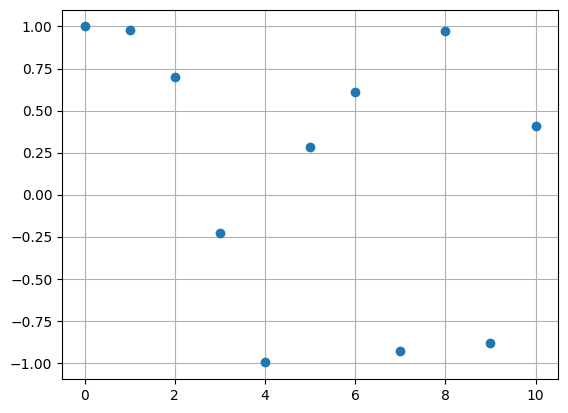

In [2]:
# xとして、linspaceで、開始が0、終了が10、項目が11つの等間隔数列を生成
x = np.linspace(0, 10, num=11, endpoint=True)
# yの値を生成
y = np.cos(-x**2/5.0)
plt.plot(x,y,'o')
plt.grid(True)

左から順に点をたどっていくと、これは何かの曲線を表しているようにも見えます（もちろん、コード見ればわかるように、`cos`関数を使って描いています。しかし今回はわからないということにしてください）。
このようなグラフにおいて、「$x$が4.5のとき」など、実点と実点の間にある$x$に対応する$y$はどのような値になるのでしょうか？　これを考えるのが補間計算です。

#### 線形補間
Scipyでは、データ間の補間は`interp1d`で計算できます。たとえば、以下では点と点の間を1次式でつないで補間（線形補間）しています。

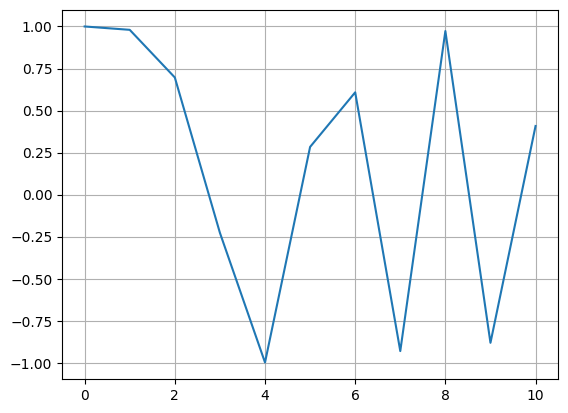

In [3]:
from scipy import interpolate

# 線形補間。interp1dのパラメータとして「linear」を指定する
f = interpolate.interp1d(x, y,'linear')
plt.plot(x,f(x),'-')
plt.grid(True)

#### スプライン3次補間
次に、スプライン3次補間も加えて、グラフを見てみましょう。スプライン3次補間は、点と点の間を3次の多項式で補間する手法です。

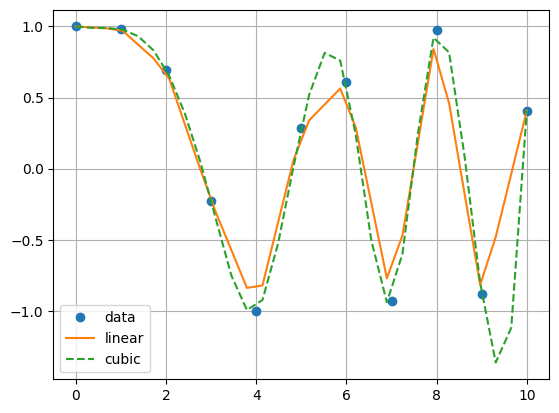

In [4]:
# スプライン3次補間を計算してf2として追加する。パラメータに「cubic」を指定する
f2 = interpolate.interp1d(x, y,'cubic')

#曲線を出すために、xの値を細かくする。
xnew = np.linspace(0, 10, num=30, endpoint=True)

# グラフ化。fを直線で描き、f2を点線で描く
plt.plot(x, y, 'o', xnew, f(xnew), '-', xnew, f2(xnew), '--')

# 凡例
plt.legend(['data', 'linear', 'cubic'], loc='best')
plt.grid(True)

ただし、あくまでこの補間した曲線は現在のデータすべてを利用して曲線を引いており、これが新しい未知のデータに対して当てはまるとは限りません。このことは後の機械学習の章で学んでいきます。参考URL「B-15」も参照してください。

#### <練習問題 5-10>

以下のデータに対して、線形補間の計算をして、グラフを描いてください。

In [ ]:
x = np.linspace(0, 10, num=11, endpoint=True)
y = np.sin(x**2/5.0)
plt.plot(x,y,'o')
plt.grid(True)

#### <練習問題 5-11>

2次元のスプライン補間（点と点の間を2次の多項式で補間する方法）を使って<練習問題 5-10>のグラフに書き込んでください（2次元のスプライン補間はパラメータを`quadratic`とします）。

#### <練習問題 5-12>

3次元のスプライン補間も加えてみましょう。

### 5.3.2 線形代数：行列の分解
キーワード：linalg、特異値分解、LU分解、コレスキー分解

ここでは、行列計算の応用を扱っていきます。なお、ここは難しい項目になりますので、大学で線形代数をやっていない方は、スキップしても構いません。

#### 特異値分解

まずは**特異値分解（singular value decomposition, SVD）**から見ていきましょう。


ある行列$A$に、別のある行列${x}$をかけたとき、もとの行列のちょうど$λ$倍になるとき、$x$を固有ベクトル、$λ$を固有値と言います。これを式で表すと以下のようになります。


\begin{eqnarray}
Ax=λx
\end{eqnarray}

固有値の計算は、行列$A$が正方行列であることを前提としていますが、特異値分解はこの計算を正方行列ではない行列にも拡張したものと言えます。


行列Aの特異値分解を式で表すと、

\begin{eqnarray}
A = U \sum V^*
\end{eqnarray}

となります。ここで、$A$は$(m,n)$行列で、$V$は$A^*A$（*は共役転置行列を表す）の固有ベクトルを列ベクトルとして並べた行列、$U$は$AA^*$の固有ベクトルを列ベクトルとして並べた行列、$\sum$は特異値を対角に並べた行列とします。

ここで、$AA^*$の固有値は$min(m,n)$であり、それらの正の固有値を$\sigma^2_i$とした時、固有値の平方根$\sigma_i$を特異値といいます。

参考URL「B-16」も参照してください。

具体的に計算をすると以下になります。ちなみに、`@`は行列の積を簡素化するための演算子です（PythonやNumpyのバージョンによっては使えませんが、Jupyter Notebook上では大丈夫です）。

In [ ]:
# (2,5)行列
A = np.array([[1,2,3,4,5],[6,7,8,9,10]])

# 特異値分解の関数linalg.svd
U, s, Vs = sp.linalg.svd(A)
m, n = A.shape

S = sp.linalg.diagsvd(s,m,n)

print('U.S.V* = \n',U@S@Vs)

ポイント：ちなみに、この特異値分解は機械学習の章で学ぶリッジ回帰や主成分分析などと関係があります。さらに深層学習を学ぶ上でも行列分解は大事です。本書では、細かい計算は追いませんが、頭の片隅において置いてください。参考URL「B-10」もご覧ください。

#### LU分解
次は、**LU分解**です。$A$を正方行列として、$Ax = b$を解く代わりに、$PLUx = b$を解くことで、効率よく解を求めることができるというのがLU分解です。置換行列$P$、対角成分がすべて1の下三角行列$L$、上三角行列$U$を$A = PLU$ となるようにおきます。具体的な計算は次のようになります。

In [ ]:
#データの準備
A = np.identity(5)
A[0,:] = 1
A[:,0] = 1
A[0,0] = 5
b = np.ones(5)

# 正方行列をLU分解する
(LU,piv) = sp.linalg.lu_factor(A)

L = np.identity(5) + np.tril(LU,-1)
U = np.triu(LU)
P = np.identity(5)[piv]

# 解を求める
x = sp.linalg.lu_solve((LU,piv),b)
x

#### コレスキー分解
次は、**コレスキー分解**です。行列$A$がエルミート行列で正定値の場合に、下三角行列$L$、共役転置$L^*$の積$A=LL^*$に分解するのがコレスキー分解です。方程式は$LL^*x = b$となり、これを解きます。

In [ ]:
A = np.array([[7, -1, 0, 1],
              [-1, 9, -2, 2],
              [0, -2, 8, -3],
              [1, 2, -3, 10]])
b = np.array([5, 20, 0, 20])


L = sp.linalg.cholesky(A)

t = sp.linalg.solve(L.T.conj(), b)
x = sp.linalg.solve(L, t)

# 解答
print(x)

In [ ]:
# 確認
np.dot(A,x)

他には、QR分解等も可能です。ここでは割愛しますが、参考URL「B-18」などを参考にしてください。

以上でScipyを使った線形代数・行列の分解については終わりになります。

なお、行列分解の計算だけを見ていると何の役に立つのかイメージしにくいのですが、実務的には商品のリコメンデーションなどに応用されています（非負値行列因子分解：NMF: Non-negative Matrix Factorizationなど）。

購買データを扱う際、1つ1つの購買（バスケット、購買ユーザー）に対して、各購入商品のフラグ付けをして行列にすることが多いのですが、ほとんど疎（スパース）な状態で、そのまま集計・分析をするとあまり意味のある結果が出ないことが多いです。そのため、次元削減するのに行列の分解の結果が使われます。なお、これらに関連する参考書籍としては、参考文献「A-11」があります。

ちなみに、非負値行列因子分解は、ある行列$X$を$X≒WH$と近似した時に、その近似後の行列$W$、$H$の要素が全部正になるようにするもおのです。以下の例はScikit-learnの`decomposition`を使って計算しています。

In [ ]:
# NMFを使います
from sklearn.decomposition import NMF

# 分解対象行列
X = np.array([[1,1,1], [2,2,2],[3,3,3], [4,4,4]])

model = NMF(n_components=2, init='random', random_state=0)

W = model.fit_transform(X)
H = model.components_

In [ ]:
W

In [ ]:
H

In [ ]:
np.dot(W, H) #W@Hでもよい

#### <練習問題 5-13>
以下の行列に対して、特異値分解をしてください。

In [ ]:
B = np.array([[1,2,3],[4,5,6],[7,8,9],[10,11,12]])
B

#### <練習問題 5-14>
以下の行列に対して、LU分解をして、$Ax=b$の方程式を解いてください。

In [ ]:
#データの準備
A = np.identity(3)
print(A)
A[0,:] = 1
A[:,0] = 1
A[0,0] = 3
b = np.ones(3)
print(A)
print(b)

### 5.3.3 積分と微分方程式
キーワード：数値積分、微分方程式、integrate

次に、積分計算や微分方程式を解く方法について説明します。

#### 積分計算

まずは積分計算から始めます。Scipyを使えば、たとえば、次の（数値）積分を求めることができます。

\begin{eqnarray}
  \int_0^1 \frac{4}{1+x^2} dx
\end{eqnarray}

これは実際は$\pi$（3.14..）に等しいですが、以下のコードで確かめていきましょう。積分計算は、`integrate.quad`を使います。

In [ ]:
# 積分計算
from scipy import integrate
import math

次に、いま提示した関数を次のように定義します。

In [ ]:
def calcPi(x):
    return 4/(1+x**2)

計算するためには`integrate.quad`を使います。`integrate.quad`の1つ目の引数には、積分したい関数を指定します。そして2つ目と3つ目の引数には、積分範囲を設定します。

In [ ]:
# 計算結果と推定誤差
integrate.quad(calcPi, 0, 1)

以下は同じ処理を無名関数を使って実行するものです。

In [ ]:
# 無名関数で書くことも可能
integrate.quad(lambda x: 4/(1+x**2), 0, 1)

どちらもほぼ3.14になっているのがわかると思います。

#### sin関数を求める例

もうひとつの例として、sin関数も求めてみましょう。

In [ ]:
from numpy import sin
integrate.quad(sin, 0, math.pi/1)

2重積分も計算できます。

\begin{eqnarray*}
  && \int_0^\infty \!\!\! \int_1^\infty \frac{\mathrm{e}^{-xt}}{t^n}  dtdx \\
  && 
\end{eqnarray*}

もちろんこれも手計算で実施可能で、$\frac{1}{n}$になりますが、`integrate.dblquad`を使って、確かめましょう。ただし、コンピューターの数値計算なので、前と同様に完全に一致することはなく、誤差が生じます。

In [ ]:
# 2重積分
def I(n):
    return integrate.dblquad(lambda t, x: np.exp(-x*t)/t**n, 0, np.inf, lambda x: 1, lambda x: np.inf)

In [ ]:
print('n=1の時:',I(1))
print('n=2の時:',I(2))
print('n=3の時:',I(3))
print('n=4の時:',I(4))

#### 微分方程式の計算

参考ですが、さらに、Scipyを使って微分方程式も計算できます。以下は、カオス理論で有名なローレンツ方程式です。

\begin{eqnarray}
\frac{dx}{dt} &=& - px + py \\
\frac{dy}{dt} &=& -xz+ rx -y \\
\frac{dz}{dt} &=& xy - bz
\end{eqnarray}


これらをpythonで表すと以下のようになります。ここで、`v`はベクトルを表しており、ローレンツ方程式の$x, y, z$がそれぞれ`v[0], v[1], [v2]`に対応しています。


In [ ]:
# モジュールの読み込み
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# ローレンツ方程式
def lorenz_func(v, t, p, r, b):
    return [-p*v[0]+p*v[1], -v[0]*v[2]+r*v[0]-v[1], v[0]*v[1]-b*v[2]]


続いて、`lorenz_func`にローレンツが論文で与えたパラメータ$p = 10$、$r = 28$、$b = 8/3$ を代入して微分方程式を解いてグラフ化します。微分方程式は`odeint`で解くことができます。


In [ ]:
# パラメータの設定
p = 10
r = 28
b = 8/3
v0 = [0.1, 0.1, 0.1]
t = np.arange(0, 100, 0.01)

# 関数の呼び出し
v = odeint(lorenz_func, v0, t, args=(p, r, b))

# 可視化
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(v[:, 0], v[:, 1], v[:, 2])

# ラベルなど
plt.title('Lorenz')
plt.grid(True)


すると、解は三次元空間に不規則な軌跡を描くことがわかりました。この節で行った内容については、参考URL「B-19」や「B-20」なども参考にしてください。

#### <練習問題 5-15>
以下の積分を求めてみましょう。

\begin{eqnarray}
  \int_0^2 (x+1)^2 dx
\end{eqnarray}

#### <練習問題 5-16>
cos関数の範囲$(0,\pi)$の積分を求めてみましょう。

### 5.3.4 最適化
キーワード：最適化、二分法、ブレント法、ニュートン法、optimize

最後に、最適化計算（線形計画法）のメソッドについて学びましょう。また、方程式の解を求める処理も紹介していきます。最適化計算は、`optimize`を使いますのでインポートしています。

In [ ]:
from scipy.optimize import fsolve

#### 2次関数の最適化

まずは、具体例として次の2次関数について、$f(x)$が0になる$x$を考えてみましょう。もちろん、解の公式で解くことができますが、Scipyの`optimize`の使い方を覚えるために、`optimize`を使って解いてみます。

\begin{eqnarray*}
\ f(x) = 2x^2 + 2x -10
\end{eqnarray*}

該当の関数を以下のように定義します。

In [ ]:
def f(x):
    y = 2 * x**2 + 2 * x - 10
    return y

グラフ化してみましょう。

In [ ]:
# グラフ化してみる
x = np.linspace(-4,4)
plt.plot(x,f(x))
plt.plot(x,np.zeros(len(x)))
plt.grid(True)

グラフから解は2と-3付近にあることがわかりますので、以下のような計算をさせると、解を算出してくれます。

In [ ]:
# x = 2 付近
x = fsolve(f,2)
print(x)

In [ ]:
# x = -3 付近
x = fsolve(f,-3)
print(x)

#### 最適化問題を解く

では、次の最適化問題を考えてみましょう。式の中にある$s.t.$はsubject toのことです。

\begin{eqnarray*}
\min x_1x_4(x_1+x_2+x_3)+x_3 
\\
s.t. \ x_1x_2x_3x_4 \ge 25
\\
1\le x_1,x_2,x_3,x_4 \le 5
\\
x_0 = (1,5,5,1)
\\
40-(x_1^2+ x_2^2+ x_3^2+ x_4^2) \ge 0
\end{eqnarray*}

上記は、$min$の後に書いてある関数を最小化するのですが、$s.t.$の後に条件式がいくつか書いてあります。これらの条件のもとで、最小値を求めていきます。$minimize$を使うため、次のようにインポートします。

In [ ]:
from scipy.optimize import minimize

次に、目的となる関数

\begin{eqnarray*}x_1x_4(x_1+x_2+x_3)+x_3 \end{eqnarray*}

を下記のように定義します。

In [ ]:
# 目的となる関数
def objective(x):
    x1 = x[0]
    x2 = x[1]
    x3 = x[2]
    x4 = x[3]
    return x1*x4*(x1+x2+x3)+x3

次に、$s.t.$以下にある制約条件をそれぞれコーディングします。

In [ ]:
# 制約式その1
def constraint1(x):
    return x[0]*x[1]*x[2]*x[3]-25.0

# 制約式その2
def constraint2(x):
    sum_sq = 40
    for i in range(4):
        sum_sq = sum_sq - x[i]**2
    return sum_sq

In [ ]:
# 初期値
x0 = [1,5,5,1]
print(objective(x0))

`minimize`を使うため、以下のように変数を作成します。`type`が`ineq`だったり、`fun`が`constrain1`だったりしますが、各パラメータは上の初めの式を見ながら意味を理解してください。

In [ ]:
b = (1.0,5.0)
bnds = (b,b,b,b)
con1 = {'type':'ineq','fun':constraint1}
con2 = {'type':'ineq','fun':constraint2}
cons = [con1,con2]

以上で準備が整ったので、最適化計算を実行します。実行には、次のように`minimize`を使います。1つ目の引数には、対象となる関数を設定し、それ以降の引数で条件式等を設定します。なお、`method`に指定している「SLSQP」はSequential Least SQuares Programmingの略で、逐次二次計画法と言う意味です。

In [ ]:
sol = minimize(objective,x0,method='SLSQP',bounds=bnds,constraints=cons)

In [ ]:
print(sol)

以上の結果からわかるように、$x$が以下のような値をとるときに、関数は約17という最小値を取ることがわかりました。

In [ ]:
print('Y:',sol.fun)
print('X:',sol.x)

これで、Scipyの話は終了です。お疲れ様でした。
これらの概念をはじめて見た方には難しかったかもしれませんが、この章で扱った計算以外にもたくさんの科学的な計算方法（`fft`、統計関数`stats`、デジタル信号のフィルタなど）があります。
上記で紹介したサイトや参考URL「B-21」もご覧ください。

次の章では、Pandasを用いたデータハンドリングについてさらに学んでいきましょう。

#### <練習問題 5-17>
Sicpyを用いて、以下の関数が0となる解を求めましょう。

\begin{eqnarray*}
\ f(x) = 5x -10
\end{eqnarray*}

#### <練習問題 5-18>
以下の関数が0となる解を求めましょう。

\begin{eqnarray*}
\ f(x) = x^3 - 2x^2 - 11x +12
\end{eqnarray*}

## 5.4 総合問題

### ■総合問題5-1 コレスキー分解

以下の行列に対して、コレスキー分解を活用して、$Ax=b$の方程式を解いてください。

In [ ]:
A = np.array([[5, 1, 0, 1],
              [1, 9, -5, 7],
              [0, -5, 8, -3],
              [1, 7, -3, 10]])
b = np.array([2, 10, 5, 10])

### ■総合問題5-2 積分

$0≤ x ≤ 1$、$0≤y≤1−x$ の三角領域で定義される以下の関数の積分値を求めてみましょう。
\begin{eqnarray}
  \int_0^1 \int_0^{1-x} 1/(\sqrt{(x+y)}(1+x+y)^2) dy dx 
\end{eqnarray}


### ■総合問題5-3 最適化問題

以下の最適化問題をSicpyを使って解いてみましょう。

\begin{eqnarray*}
\ min \ f(x) = x^2+1
\\  s.t. x \ge -1
\end{eqnarray*}